<a href="https://colab.research.google.com/github/sunkusaipurnima/DSML/blob/main/EDA/Yulu%20%3A%20Hypothesis%20Testing/src/Yulu_CaseStudyipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# **Column Profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

# **The company wants to know:**

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [ ]:
# Importing libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Importing Libraries for Hypothesis Testing

from scipy.stats import ttest_ind,ttest_1samp
from scipy.stats import f_oneway,shapiro, levene
from scipy.stats import chi2_contingency,chi2,chisquare
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv"

--2024-06-23 05:01:22--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.10, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv’

bike_sharing.csv    100%[===================>] 633.16K  --.-KB/s    in 0.1s    

2024-06-23 05:01:23 (6.21 MB/s) - ‘bike_sharing.csv’ saved [648353/648353]



In [ ]:
bike_sharing = pd.read_csv("bike_sharing.csv")
bike_sharing.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_sharing.shape

(10886, 12)

In [ ]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
bike_sharing.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
bike_sharing.duplicated().sum()

0

In [ ]:
bike_sharing[['count','temp','atemp','windspeed']].describe().T


,count,mean,std,min,25%,50%,75%,max
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969


Converting columns to relevant data types

In [ ]:
bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])

In [ ]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    bike_sharing[col] = bike_sharing[col].astype('object')

In [ ]:
bike_sharing['year'] = bike_sharing['datetime'].dt.year
bike_sharing['month'] = bike_sharing['datetime'].dt.month
bike_sharing['day'] = bike_sharing['datetime'].dt.day
bike_sharing['hour'] = bike_sharing['datetime'].dt.hour
bike_sharing['weekday'] = bike_sharing['datetime'].dt.weekday

In [ ]:
bike_sharing['date']=bike_sharing['datetime'].dt.date

In [ ]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  weekday     10886 non-

In [ ]:
bike_sharing.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5,2011-01-01
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5,2011-01-01
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,5,2011-01-01
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,5,2011-01-01
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,5,2011-01-01
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,5,2011-01-01


## **EDA Observations:**

Dataset has 10886 rows and 12 columns.
There are no null values and no duplicates


In [ ]:
bike_sharing.groupby(by='date').agg({'count':'max'}).sort_values(by='count',ascending=False).head(10)


,count
date,
2012-09-12,977
2012-09-11,970
2012-09-10,968
2012-10-10,948
2012-10-16,943
2012-10-03,917
2012-10-04,901
2012-10-05,900
2012-08-16,897


In [ ]:
# minimum datetime and maximum datetime
print(bike_sharing['datetime'].min(), bike_sharing['datetime'].max())
# number of unique values in each categorical columns
bike_sharing[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()


2011-01-01 00:00:00 2012-12-19 23:00:00


value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

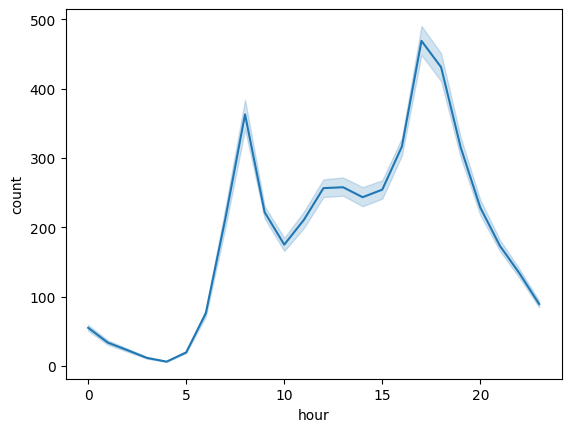

In [ ]:
sns.lineplot(x=bike_sharing['hour'],y=bike_sharing['count'])
plt.show()

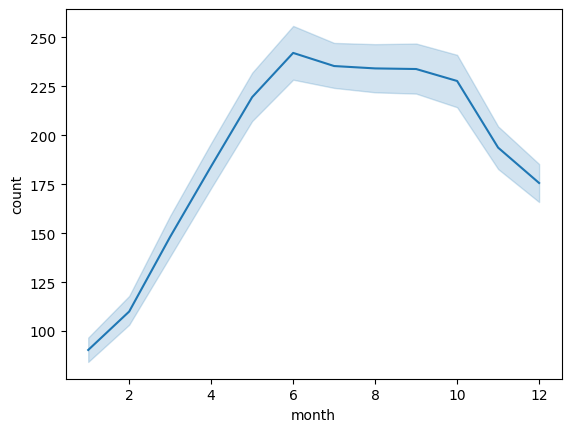

In [ ]:
sns.lineplot(x=bike_sharing['month'],y=bike_sharing['count'])
plt.show()

**Univariate Analysis:**

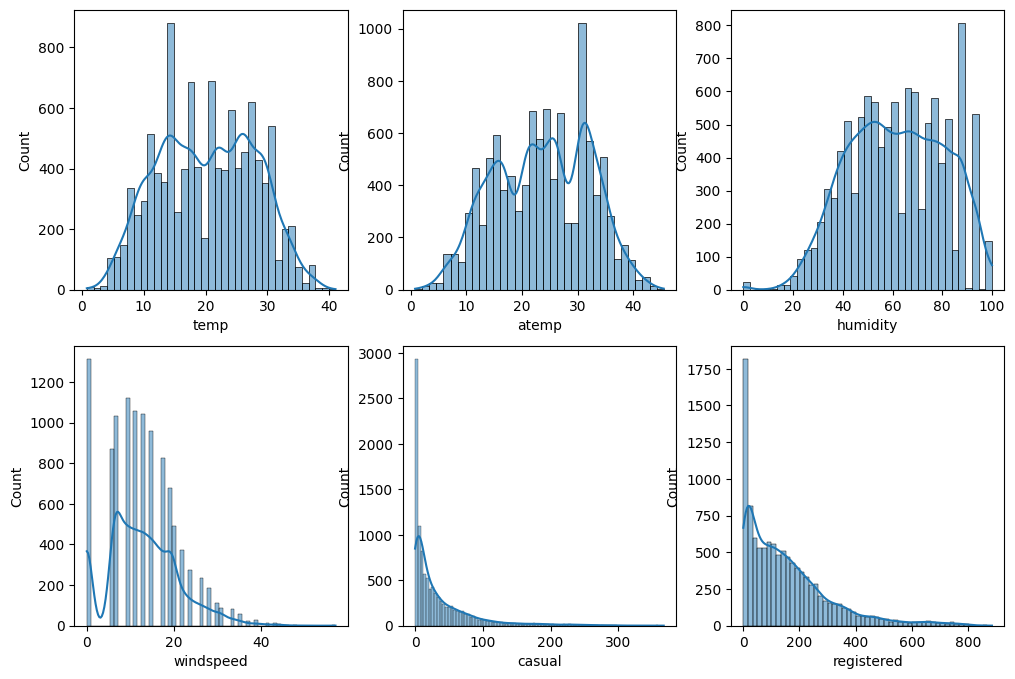

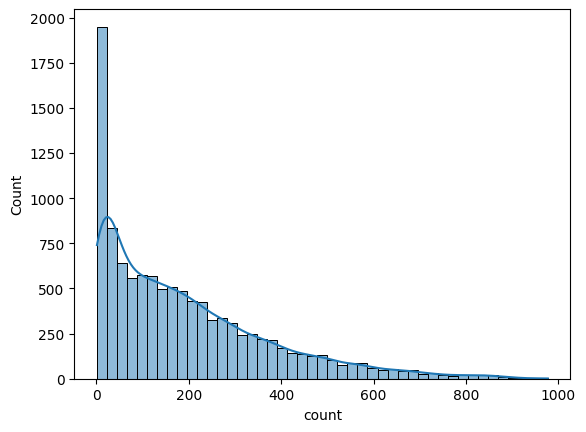

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(bike_sharing[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(bike_sharing[num_cols[-1]], kde=True)
plt.show()

**Observations:**
* casual, registered and count somewhat looks like Log Normal
Distribution
* temp, atemp and humidity looks like they follows the Normal Distribution
* windspeed follows the binomial distribution

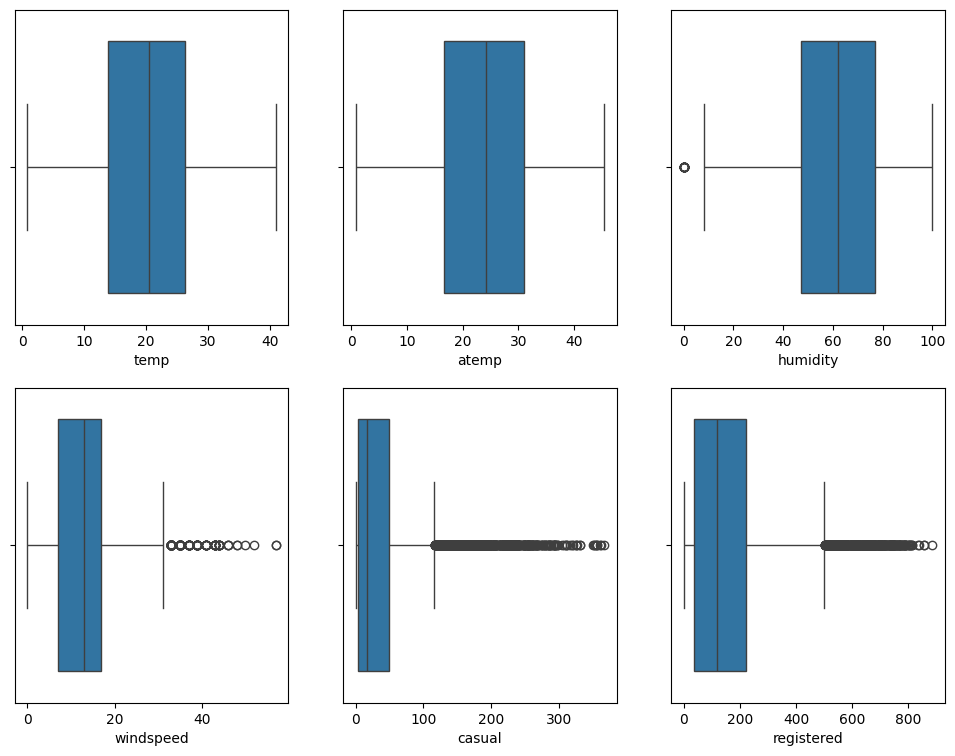

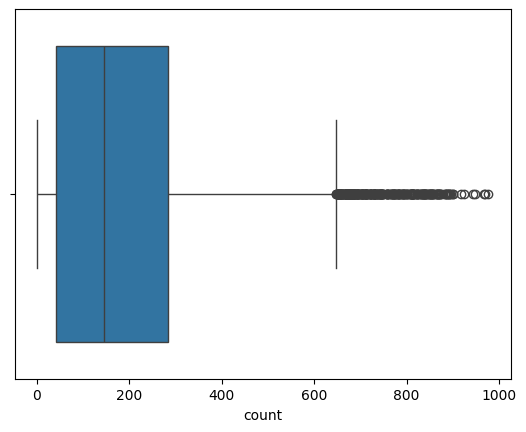

In [ ]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=bike_sharing[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=bike_sharing[num_cols[-1]])
plt.show()

**Observations:**
* Looks like humidity, casual, registered and count have outliers in the data.

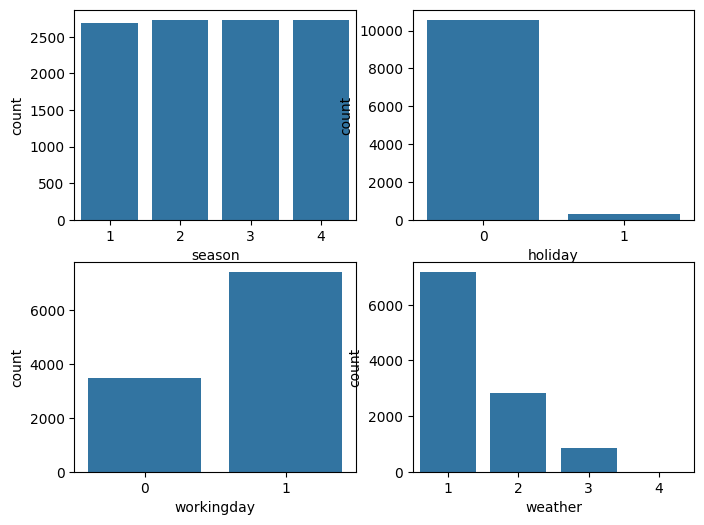

In [ ]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=bike_sharing, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

**Observations:**
* Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

# **Hypothesis Testing**

Checking the relation between dependant variable 'count' and independant variables 'workingday','weather','season'

**Question:Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**




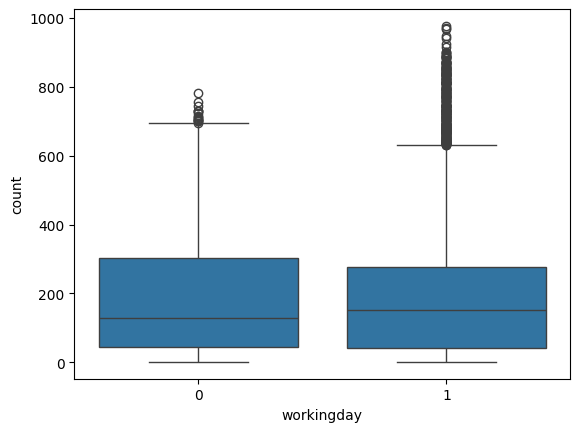

In [ ]:
sns.boxplot(x=bike_sharing['workingday'],y=bike_sharing['count'])
plt.show()

# **Observations:**

Average number of cycles rented on working day are almost equal on working day and holiday.

To check the actual difference statistically lets perfrom two sample ttest.




In [ ]:
bike_sharing.groupby(by='workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


# **Observations:**

There are total of 3474 records available for working day , hence sampling for the same number in ttest.  

Mean of the working day is less than non working day, hence taking the same as null hypothesis.

Std(Variance) is not same across the groups, hence shall equal_var=False.

Let us take the samples and conduct two sample ttest to check the null hypothesis. As the sample are large, this is equivalent to z-test.

Assuming a default confidence interval of 95%

**Ttest Hypothesis Testing Framework:**


H0= mean of cycles rented on working day is <= the mean of cycles rented on a non- working day

Ha= mean of cycles rented on working day is > the mean of cycles rented on a non- working day (two tail test)

significance level(alpha)=0.05

In [ ]:
df_workingday = bike_sharing[bike_sharing['workingday']==1]['count'].sample(3474)
df_non_workingday = bike_sharing[bike_sharing['workingday']==0]['count'].sample(3474)

In [ ]:

ttest_value,p_value= ttest_ind(df_workingday,df_non_workingday,equal_var=False, alternative='greater')

print("ttest statistic value ", ttest_value)
print("p-value ", p_value)

if(p_value<0.05):
  print("Reject Null Hypothesis,Number of cycles rented on working day are greater than those on non working days.")
else:
  print("Fail to reject  Null Hypothesis, Number of cycles rented on working day are less than  those on non working days.")

ttest statistic value  0.2778067028953996
p-value  0.3905845182504048
Fail to reject  Null Hypothesis, Number of cycles rented on working day are less than  those on non working days.


**Conclusion:**

Number of Cycles renter on working day are less than those on non working days.

**Question: Checking if the demand of bicycles on rent is the same for seasons**


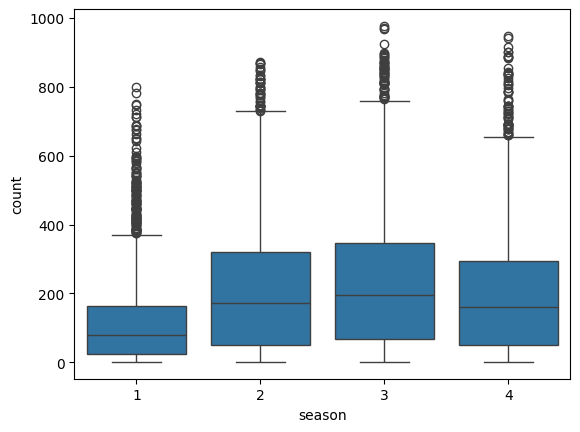

In [ ]:
sns.boxplot(x=bike_sharing['season'],y=bike_sharing['count'])
plt.show()

Outlier treatment :

In [ ]:
q1= bike_sharing['count'].quantile(0.25)
q3= bike_sharing['count'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

647.0
-321.0


In [ ]:
bike_sharing = bike_sharing[(bike_sharing['count']<=upper_limit) & (bike_sharing['count']>=lower_limit)]


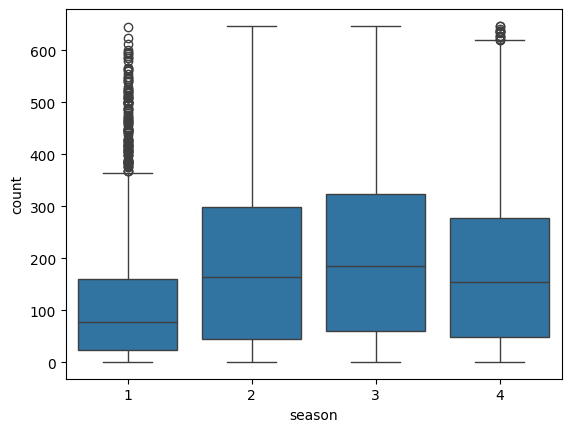

In [ ]:
sns.boxplot(x=bike_sharing['season'],y=bike_sharing['count'])
plt.show()

In [ ]:
bike_sharing.groupby(by='season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.0,78.0,161.0,644.0
2,2634.0,195.824981,166.371838,1.0,45.0,165.0,299.0,647.0
3,2617.0,210.651127,164.245975,1.0,60.0,185.0,324.0,647.0
4,2665.0,184.578236,154.793646,1.0,49.0,154.0,277.0,647.0


To check the effect of season on the cycles rented.. let us use ANOVA test .

As there are four independant variables, we can use ANOVA Test to check if these different types of weather affect the demand of cycles.

**Assumptions of ANOVA ,**

1) Normality of the data 2) Equal variance in between the groups.

Shapiro test or qq plots can be used to check the normality of the data

Levene's test can be used to check the variance between the groups.

In [ ]:
s1= bike_sharing[bike_sharing['season']==1]['count'].sample(2600)
s2= bike_sharing[bike_sharing['season']==2]['count'].sample(2600)
s3= bike_sharing[bike_sharing['season']==3]['count'].sample(2600)
s4= bike_sharing[bike_sharing['season']==4]['count'].sample(2600)

Text(0.5, 1.0, 'qqplot for season 1')

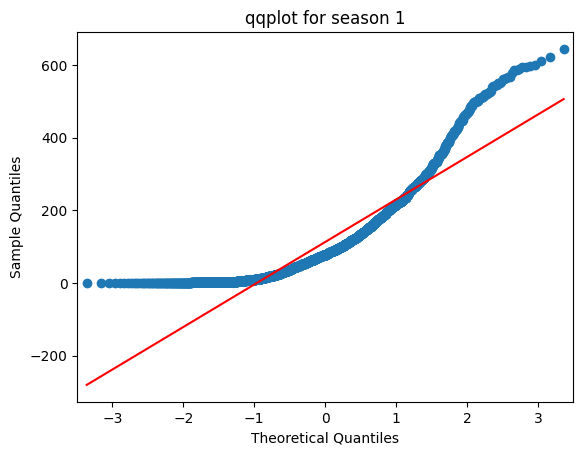

In [ ]:
qqplot(s1,line='s')
plt.title("qqplot for season 1")

Text(0.5, 1.0, 'qqplot for season 2')

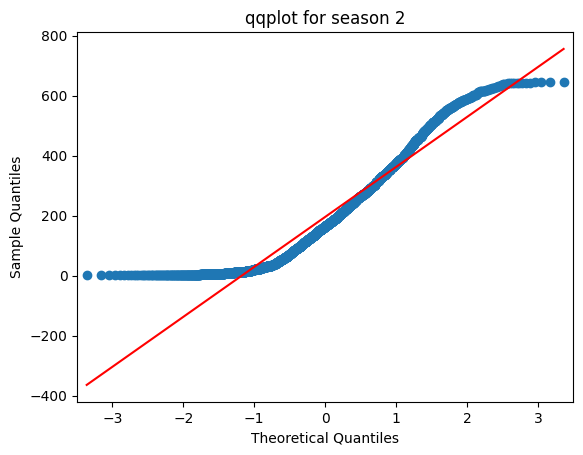

In [ ]:
qqplot(s2,line='s')
plt.title("qqplot for season 2")

Text(0.5, 1.0, 'qqplot for season 3')

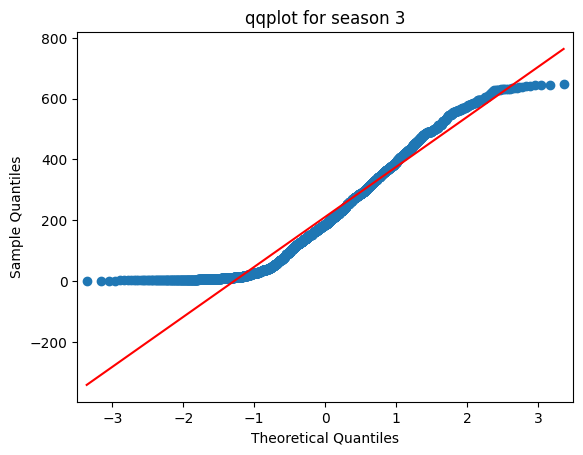

In [ ]:
qqplot(s3,line='s')
plt.title("qqplot for season 3")

Text(0.5, 1.0, 'qqplot for season 4')

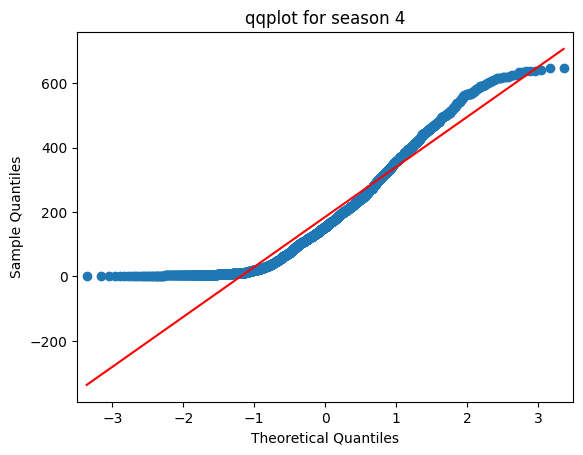

In [ ]:
qqplot(s4,line='s')
plt.title("qqplot for season 4")

In [ ]:
# Leven's test to check variance

test_value , p_value_levene=levene(s1,s2,s3,s4)
print(test_value)
print(p_value_levene)

if(p_value_levene<=0.05):
  print("Reject Null Hypothesis,Variance between the groups is different.")
else:
  print("Fail to reject  Null Hypothesis,Variance between the groups is same.")

174.56086324584564
2.027123651265142e-110
Reject Null Hypothesis,Variance between the groups is different.


Observations:

Based on QQ plots and Leven's test its evident that assumptions of ANOVA fail.

But, its proven than parametric tests give more accurate statistical test results than non-parametric statistical results.

Also for larger samples, assumptions of ANOVA has no significant impact on the test, so shall test the effect using ANOVA.


**ANOVA Hypothesis Testing Framework **

H0: Seasons has no effect on the demand of cycles

Ha: There is a significant effect of seasons on the demand of cycles.

significance level : 0.05

In [ ]:
f_value, p_value= f_oneway(s1,s2,s3,s4)
print("f_value ", f_value)
print("p_value ", p_value)

if(p_value<0.05):
  print("Reject Null Hypothesis,Seasons has significant effect on the number of cycles rented.")
else:
  print("Fail to reject  Null Hypothesis,Seasons has no effect on the number of cycles rented.")


f_value  214.17870386161508
p_value  8.138797634804922e-135
Reject Null Hypothesis,Seasons has significant effect on the number of cycles rented.


Statistically it is proven that atleast one season has significant effect on demand of cycles

**Question:Check if the demand of bicycles on rent is the same for different Weather conditions?**



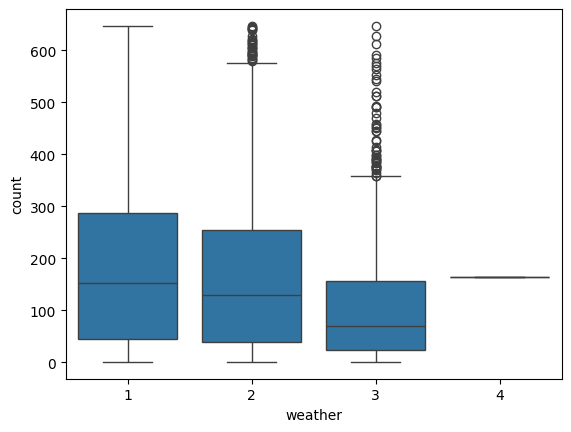

In [ ]:
sns.boxplot(x=bike_sharing['weather'],y=bike_sharing['count'])
plt.show()

In [ ]:
bike_sharing.groupby(by='weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6965.0,187.329218,161.581066,1.0,45.0,153.0,287.0,647.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


# **Observations:**

Data for weather(4) is negligible, so ignoring for analysis.

As there are three independant variables, we can use ANOVA Test to check if these different types of weather affect the demand of cycles.

Assumptions of ANOVA ,

1) Normality of the data
2) Equal variance in between the groups.

Shapiro test or qq plots can be used to check the normality of the data

Levene's test can be used to check the variance between the groups.

In [ ]:
#Taking equal samples of the three groups.
w1= bike_sharing[bike_sharing['weather']==1]['count'].sample(850)
w2= bike_sharing[bike_sharing['weather']==2]['count'].sample(850)
w3= bike_sharing[bike_sharing['weather']==3]['count'].sample(850)

Shapiro test to check normality on the three groups

In [ ]:
p_value_w1=shapiro(w1)
p_value_w2=shapiro(w2)
p_value_w3=shapiro(w3)

print("p_value_w1 ", p_value_w1)
print("p_value_w2 ", p_value_w2)
print("p_value_w3 ", p_value_w3)



p_value_w1  ShapiroResult(statistic=0.8984133005142212, pvalue=2.8354633361534037e-23)
p_value_w2  ShapiroResult(statistic=0.8995742797851562, pvalue=3.757114775272079e-23)
p_value_w3  ShapiroResult(statistic=0.8118053674697876, pvalue=2.4638935234478347e-30)


Since p_value is greater than 0.05, data is not normal .

In [ ]:
# Levenes test to check the variance .

p_value_levene=levene(w1,w2,w3)
p_value_levene

LeveneResult(statistic=37.90705756305481, pvalue=5.990107060186e-17)

p_value is greater than 0.05, so variance between the groups is also different.

So Statistically and visually also both the assumptions of the ANOVA fail , so we can use Kruskal Wallis test to check the effect of weather on demand of cycles.

But, its proven than parametric tests give more accurate statistical test results than non-parametric statistical results.

Also for larger samples, assumptions of ANOVA has no significant impact on the test, so shall test the effect using ANOVA.



**ANOVA Framework:**

HO: Weather has no effect on the number of the cycles rented.

Ha: Weather has significant effect on the number of cycles rented.

significance level alpha = 0.05

In [ ]:

f_value,p_value=f_oneway(w1,w2,w3)

print("f_value ", f_value)
print("p_value ", p_value)

if(p_value<0.05):
  print("Reject Null Hypothesis,Weather has significant effect on the number of cycles rented.")
else:
  print("Fail to reject  Null Hypothesis,Weather has no effect on the number of cycles rented.")

f_value  50.8106621966621
p_value  2.3017350090856134e-22
Reject Null Hypothesis,Weather has significant effect on the number of cycles rented.


Weather has significant effect on the number of cycles rented.

**Question: Check if the Weather conditions are significantly different during different Seasons?**

Need to perform Chi2 test to check the effect both the categorical columns.

**Chi2 test Framework**

H0: Weather is independat of season.
Ha: Weather is not independant of Season.

alpha=0.5

In [ ]:
data= pd.crosstab(bike_sharing['season'],bike_sharing['weather'])
data

weather,1,2,3,4
season,,,,
1,1744,714,211,1
2,1721,690,223,0
3,1843,579,195,0
4,1657,787,221,0


In [ ]:
result=chi2_contingency(data)

print("p_value ", p_value)

if(result.pvalue<0.05):
  print("Reject Null Hypothesis,Weather is not independant of Season.")
else:
  print("Fail to reject  Null Hypothesis,Weather is independant of Season.")

p_value  Chi2ContingencyResult(statistic=47.17309400137371, pvalue=3.643774770920206e-07, dof=9, expected_freq=array([[1.75671169e+03, 6.98649159e+02, 2.14386926e+02, 2.52219913e-01],
       [1.73302569e+03, 6.89229171e+02, 2.11496316e+02, 2.48819195e-01],
       [1.72184064e+03, 6.84780843e+02, 2.10131305e+02, 2.47213301e-01],
       [1.75342197e+03, 6.97340828e+02, 2.13985452e+02, 2.51747591e-01]]))
Reject Null Hypothesis,Weather is not independant of Season.


**Observation:**

Weather and Season are dependant.

Checking the correlation between numerical columns and drawing scatter plots..

In [ ]:
bike_sharing.corr(numeric_only=True)

,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
temp,1.000000,0.985887,-0.051216,-0.021912,0.468614,0.304585,0.388065,0.040758,0.261946,0.013324,0.133844,-0.033946
atemp,0.985887,1.000000,-0.030373,-0.062398,0.463624,0.302263,0.384680,0.038626,0.268960,0.010763,0.129188,-0.035392
humidity,-0.051216,-0.030373,1.000000,-0.319719,-0.335296,-0.274223,-0.323363,-0.066067,0.207596,-0.006952,-0.270745,-0.025160
windspeed,-0.021912,-0.062398,-0.319719,1.000000,0.088725,0.102881,0.110181,-0.018486,-0.152754,0.037082,0.145146,-0.025355
casual,0.468614,0.463624,-0.335296,0.088725,1.000000,0.513744,0.717512,0.114209,0.095946,0.003865,0.301604,0.251826
registered,0.304585,0.302263,-0.274223,0.102881,0.513744,1.000000,0.966215,0.211963,0.171011,0.014742,0.412861,-0.060132
count,0.388065,0.384680,-0.323363,0.110181,0.717512,0.966215,1.000000,0.206398,0.167664,0.013130,0.425799,0.026832
year,0.040758,0.038626,-0.066067,-0.018486,0.114209,0.211963,0.206398,1.000000,-0.012936,-0.001051,-0.016837,0.003398
month,0.261946,0.268960,0.207596,-0.152754,0.095946,0.171011,0.167664,-0.012936,1.000000,0.004696,-0.007775,-0.000474
day,0.013324,0.010763,-0.006952,0.037082,0.003865,0.014742,0.013130,-0.001051,0.004696,1.000000,0.000766,-0.012180


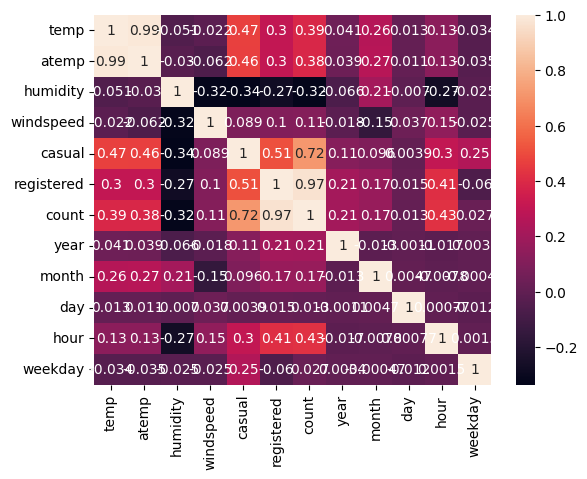

In [ ]:
sns.heatmap(bike_sharing.corr(numeric_only=True),annot=True)
plt.show()

**Insights**
* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend,
slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were
rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

**Recommendations**
* In summer and fall seasons the company should have more bikes in stock to be
rented. Because the demand in these seasons is higher as compared to other
seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes
being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temperature is less than 10 or in very cold days, company should have
less bikes.
* Whenever the windspeed is greater than 35 or in thunderstorms, company should
have less bikes in stock to be rented.

